In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import urllib
import requests
import json
import chess.pgn
from glob import glob

In [2]:
username = "bm_bhattarai"
pgn_archive_links = requests.get(f'https://api.chess.com/pub/player/{username}/games/archives')
print(username)

bm_bhattarai


In [3]:
for url in json.loads(pgn_archive_links.text)['archives']:
    filepath = './bm_bhattarai/'+username + url.split("/")[7] + url.split("/")[8]
    urllib.request.urlretrieve(url + "/pgn",filepath)

In [4]:
pgn_files = glob("../Chess com/bm_bhattarai/*")

In [5]:
headers = []
games = []
for pgn in pgn_files:
    pgn = open(pgn)

    while True:
        
        game = chess.pgn.read_game(pgn)

        if game is None:
            break
        headers.append(game.headers) 
        games.append(game.mainline_moves())

        

In [6]:
df = pd.DataFrame(headers)

In [7]:
df['moves'] = games 

In [8]:
df.head(2)

,Black,BlackElo,CurrentPosition,Date,ECO,ECOUrl,EndDate,EndTime,Event,FEN,...,StartTime,Termination,TimeControl,Timezone,Tournament,UTCDate,UTCTime,White,WhiteElo,moves
0,BM_Bhattarai,445,2r5/2P5/8/pP1k4/P1R5/3K4/2P3P1/8 b - -,2022.05.04,D02,https://www.chess.com/openings/Queens-Pawn-Ope...,2022.05.04,16:27:39,Live Chess,NaN,...,15:59:56,Game drawn by agreement,900+10,UTC,NaN,2022.05.04,15:59:56,suraj410,1424,1. d4 { [%clk 0:15:10] } 1... d5 { [%clk 0:15:...
1,Andrea850,394,rnbqkbnr/ppppppp1/8/7p/4P3/5N2/PPPP1PPP/RNBQKB...,2021.09.02,B00,https://www.chess.com/openings/Kings-Pawn-Open...,2021.09.02,10:19:16,Live Chess,NaN,...,10:18:57,BM_Bhattarai won by resignation,600,UTC,NaN,2021.09.02,10:18:57,BM_Bhattarai,495,1. e4 { [%clk 0:09:58] } 1... h5 { [%clk 0:09:...


In [9]:
df.shape

(510, 25)

### Analysis of my games in Black

In [10]:
blacks = df[df['Black']=='BM_Bhattarai']
blacks_won = blacks[blacks['Result']=='0-1']

In [11]:
print('Number of black game : ',blacks.shape[0])
print('Number of black game won : ',blacks_won.shape[0])
print('Win Percentage in Black :',(blacks_won.shape[0]/blacks.shape[0])*100)


Number of black game :  243
Number of black game won :  114
Win Percentage in Black : 46.913580246913575


In [12]:
whites = df[df['White']=='BM_Bhattarai']
whites_won = whites[whites['Result']=='1-0']

#### Similar in Whites

In [13]:
print('Number of white game : ',whites.shape[0])
print('Number of white game won : ',whites_won.shape[0])
print('Win Percentage in White :',(whites_won.shape[0]/whites.shape[0])*100)

Number of white game :  267
Number of white game won :  108
Win Percentage in White : 40.44943820224719


In [14]:
df.columns

Index(['Black', 'BlackElo', 'CurrentPosition', 'Date', 'ECO', 'ECOUrl',
       'EndDate', 'EndTime', 'Event', 'FEN', 'Link', 'Result', 'Round',
       'SetUp', 'Site', 'StartTime', 'Termination', 'TimeControl', 'Timezone',
       'Tournament', 'UTCDate', 'UTCTime', 'White', 'WhiteElo', 'moves'],
      dtype='object')

#### Total Number of Games Drawn

In [15]:
draws = df[df['Result']=='1/2-1/2']

In [16]:
draws.shape[0]

35

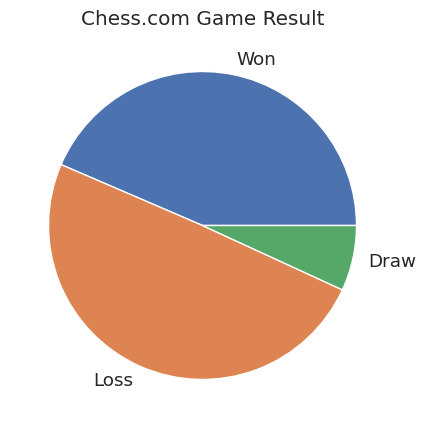

In [17]:
sns.set_theme(font_scale=1.2,style="darkgrid")
plt.figure(figsize=(10,5))
plt.pie(x=[
    whites_won.shape[0]+blacks_won.shape[0],
    df.shape[0]-(whites_won.shape[0]+blacks_won.shape[0])-draws.shape[0],
    draws.shape[0]
    ],
    labels=['Won','Loss','Draw'])
plt.title('Chess.com Game Result')
plt.show()

#### Add a new Column name Outcome(i.e Result) in favour of Us

In [18]:
outcome = []
for i in range(len(df)):
    if df.iloc[i]['Black']=='BM_Bhattarai' and df.iloc[i]['Result']=='0-1' or df.iloc[i]['White']=='BM_Bhattarai' and df.iloc[i]['Result']=='1-0':
        outcome.append('Win')
    elif df.iloc[i]['Result']=='1/2-1/2':
        outcome.append('Draw')
    else:
        outcome.append('Loss')

#### Add a new Column name Color (Black/White)

In [19]:
color = []
for i in range(len(df)):
    if df.iloc[i]['Black'] == 'BM_Bhattarai':
        color.append('Black')
    else:
        color.append('White')

#### Similarly, Add a new Column name Format of Game

In [20]:
df['TimeControl'].value_counts()

600         150
300         123
60          120
180          72
900+10       23
60+1         13
1200          4
300+5         2
1/86400       1
1/604800      1
180+2         1
Name: TimeControl, dtype: int64

In [21]:
format = []
for i in range(len(df)):
    if df.iloc[i]['TimeControl'] == '60' or df.iloc[i]['TimeControl'] == '60+1':
        format.append('Bullet')
    elif '180' in df.iloc[i]['TimeControl'] or '300' in df.iloc[i]['TimeControl']:
        format.append('Biltz')
    elif df.iloc[i]['TimeControl'] == '600':
        format.append('Rapid')
    else:
        format.append('Classical')

In [22]:
df['Format'] = format
df['Color']=color
df['Outcome']=outcome

In [23]:
df.columns

Index(['Black', 'BlackElo', 'CurrentPosition', 'Date', 'ECO', 'ECOUrl',
       'EndDate', 'EndTime', 'Event', 'FEN', 'Link', 'Result', 'Round',
       'SetUp', 'Site', 'StartTime', 'Termination', 'TimeControl', 'Timezone',
       'Tournament', 'UTCDate', 'UTCTime', 'White', 'WhiteElo', 'moves',
       'Format', 'Color', 'Outcome'],
      dtype='object')

In [24]:
pd.crosstab(df['Color'],df['Outcome'])

Outcome,Draw,Loss,Win
Color,,,
Black,15,114,114
White,20,139,108


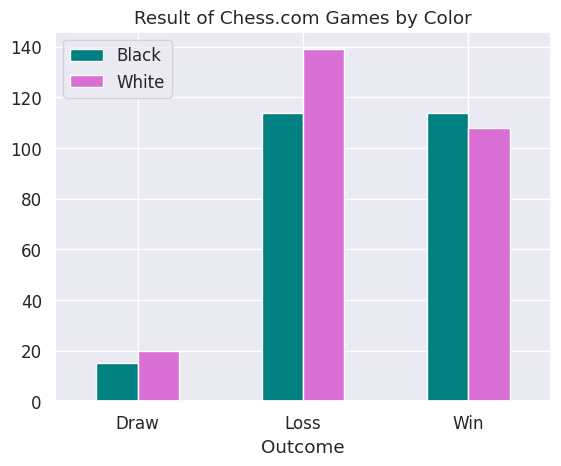

In [25]:
sns.set_theme(font_scale=1.1,style='darkgrid')
pd.crosstab(df['Outcome'],df['Color']).plot(kind='bar',title='Result of Chess.com Games by Color',rot=0,color=['teal','orchid']).legend(loc='upper left',fontsize=12)

In [26]:
pd.crosstab(df['Format'],df['Outcome'])

Outcome,Draw,Loss,Win
Format,,,
Biltz,12,104,82
Bullet,3,64,66
Classical,2,17,10
Rapid,18,68,64


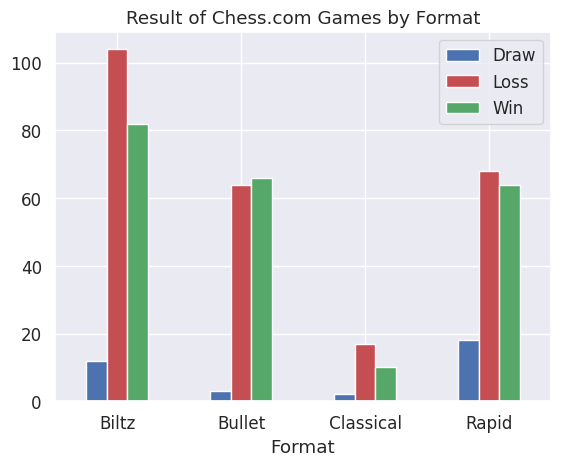

In [27]:
pd.crosstab(df['Format'],df['Outcome']).plot(kind='bar',title='Result of Chess.com Games by Format',rot=0,color=['b','r','g']).legend(loc='upper right',fontsize=12)

In [54]:
df['Date_'] = (df.Date.str.split('.')).str.join('-')

In [67]:
df['Date_'] = pd.to_datetime(df['Date_'])

In [71]:
df['Year'] = df['Date_'].dt.year
df['Month'] = df['Date_'].dt.strftime('%b')
df['Day'] = df['Date_'].dt.day
df['Mon'] = df['Date_'].dt.month

In [81]:
df.head(1)

,Black,BlackElo,CurrentPosition,Date,ECO,ECOUrl,EndDate,EndTime,Event,FEN,...,WhiteElo,moves,Format,Color,Outcome,Date_,Datetime,Year,Month,Day
0,BM_Bhattarai,445,2r5/2P5/8/pP1k4/P1R5/3K4/2P3P1/8 b - -,2022.05.04,D02,https://www.chess.com/openings/Queens-Pawn-Ope...,2022.05.04,16:27:39,Live Chess,NaN,...,1424,1. d4 { [%clk 0:15:10] } 1... d5 { [%clk 0:15:...,Classical,Black,Draw,2022-05-04,2022-05-04 16:27:39,2022,May,4


In [83]:
pd.crosstab(df['Outcome'],df['Month'])

Month,Apr,Aug,Dec,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Outcome,,,,,,,,,,,
Draw,6,4,8,3,2,1,1,1,1,7,1
Loss,22,46,29,15,10,17,11,14,5,71,13
Win,17,47,19,11,13,12,11,7,7,69,9


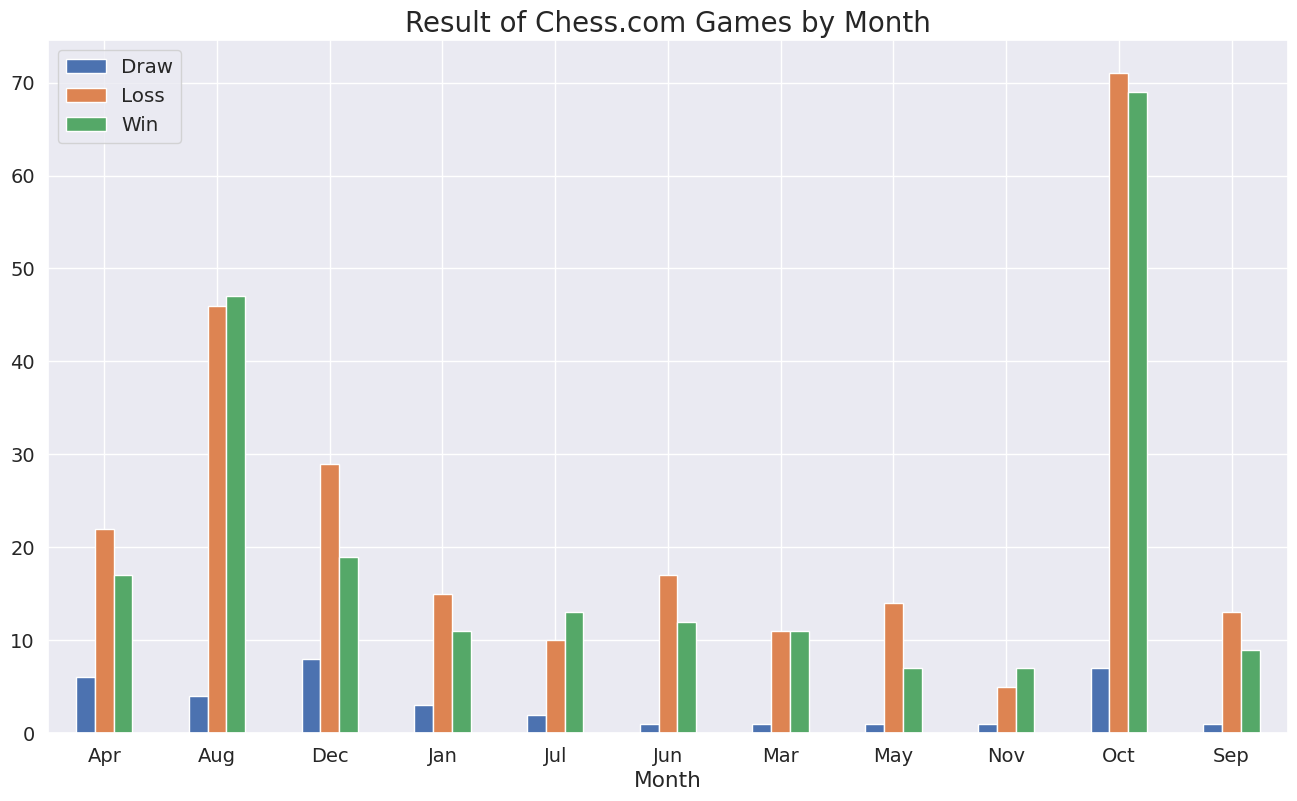

In [106]:
sns.set_theme(font_scale=1.3)
fig = pd.crosstab(df['Month'],df['Outcome']).plot(kind='bar',title='Result of Chess.com Games by Month',rot=0,figsize=(16,9),fontsize=14).legend(loc='upper left')
fig.axes.title.set_size(20)

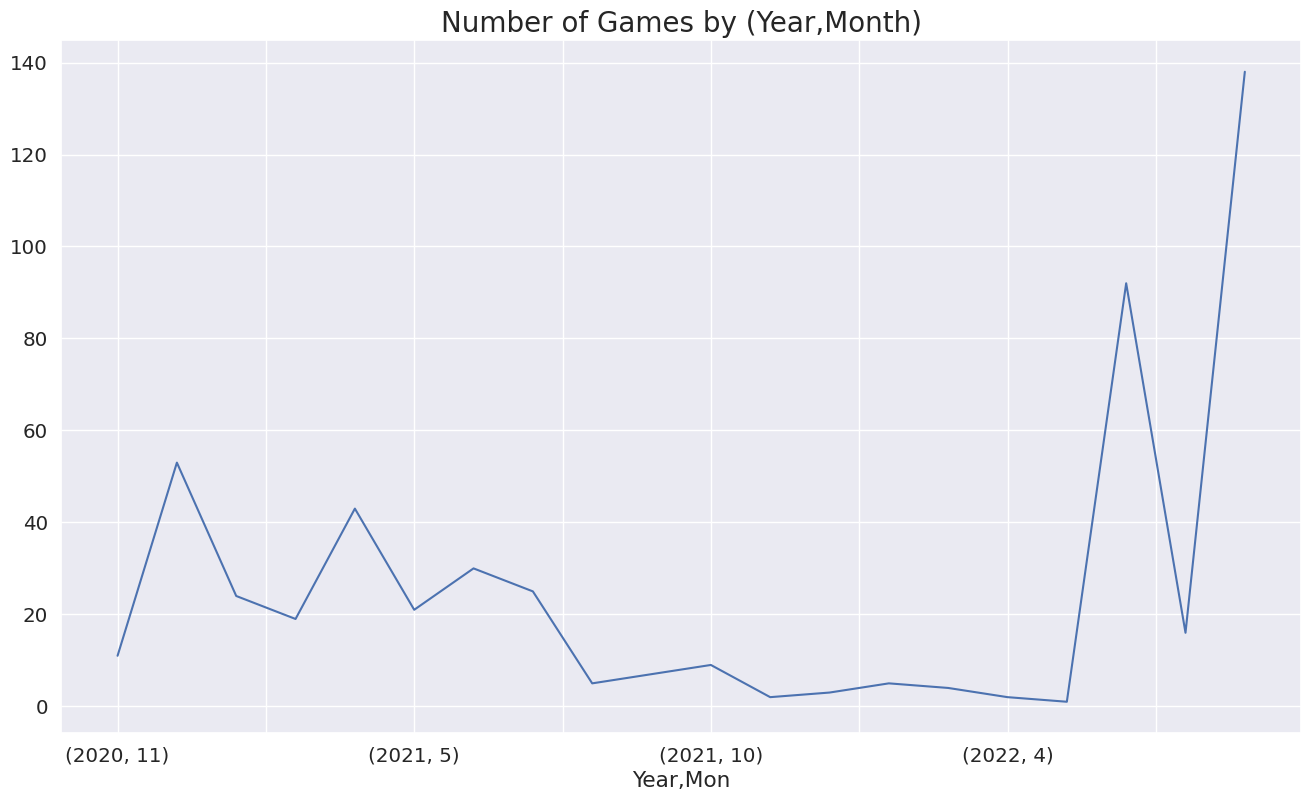

In [124]:
plt.figure(figsize=(16,9))
df.groupby(by=["Year","Mon"]).count()['ECO'].plot()
plt.title('Number of Games by (Year,Month)',fontsize=20)
plt.show()

In [140]:
monthwise = df.groupby(by=["Year","Mon"]).count()['ECO'].reset_index()

In [143]:
monthwise

,Year,Mon,ECO
0,2020,11,11
1,2020,12,53
2,2021,1,24
3,2021,3,19
4,2021,4,43
5,2021,5,21
6,2021,6,30
7,2021,7,25
8,2021,8,5
9,2021,9,7
